In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv("CarData", header=None)
columns = [ 'Buying', 'Maint',	'Doors', 'Persons',	'Lug_boot',	'Safety', 'Condition']
data.columns = columns
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
print("Unique values of each col")
for col in columns:
    print(f"{col}: {data[col].unique()}")

Unique values of each col
Buying: ['vhigh' 'high' 'med' 'low']
Maint: ['vhigh' 'high' 'med' 'low']
Doors: ['2' '3' '4' '5more']
Persons: ['2' '4' 'more']
Lug_boot: ['small' 'med' 'big']
Safety: ['low' 'med' 'high']
Condition: ['unacc' 'acc' 'vgood' 'good']


In [6]:
order_dict = {
    'Buying' : ['vhigh', 'high', 'med', 'low'],
    'Maint' : ['vhigh', 'high', 'med', 'low'],
    'Doors' : ['2', '3', '4', '5more'],
    'Persons' : ['2', '4', 'more'],
    'Lug_boot' : ['small', 'med', 'big'],
    'Safety' : ['low', 'med', 'high'],
    'Condition' : ['unacc', 'acc', 'vgood', 'good'],
}

# Apply Ordinal Encoding to each column
for col in order_dict:
    # Fit the encoder for each column with the defined order
    ordinal_encoder = OrdinalEncoder(categories=[order_dict[col]])
    data[col] = ordinal_encoder.fit_transform(data[[col]])


In [8]:
X = data.drop(columns=['Condition'])
y = data['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)


In [22]:
for k in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"Accuracy for k = {k}: {knn.score(X_test,y_test)}")

Accuracy for k = 3: 0.8901734104046243
Accuracy for k = 5: 0.9364161849710982
Accuracy for k = 7: 0.953757225433526
Accuracy for k = 9: 0.9364161849710982


In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

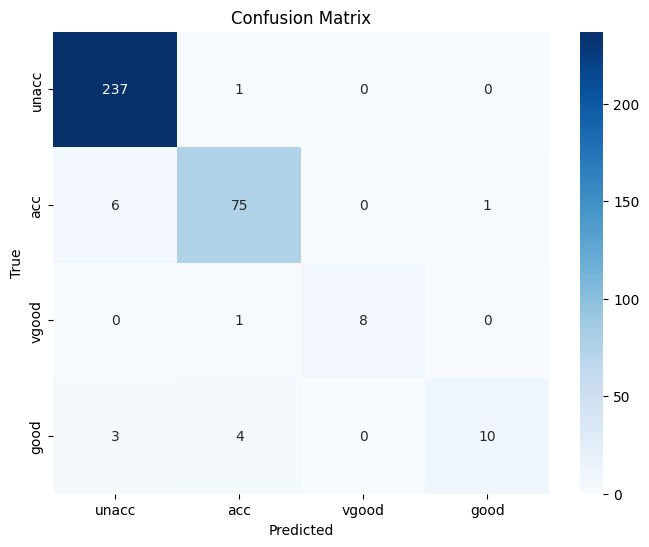

In [11]:
y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

class_labels = ['unacc', 'acc', 'vgood', 'good']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Get precision, recall, and F1-score
print(classification_report(y_test, y_predict, target_names=class_labels))

              precision    recall  f1-score   support

       unacc       0.96      1.00      0.98       238
         acc       0.93      0.91      0.92        82
       vgood       1.00      0.89      0.94         9
        good       0.91      0.59      0.71        17

    accuracy                           0.95       346
   macro avg       0.95      0.85      0.89       346
weighted avg       0.95      0.95      0.95       346



Data is Imbalanced first we have to overcome it

In [18]:
data['Condition'].value_counts()

Condition
0.0    1210
1.0     384
3.0      69
2.0      65
Name: count, dtype: int64

In [21]:
smote = SMOTE(sampling_strategy={1.0 : 600, 3.0 : 200, 2.0: 65})
X_smote, y_smote = smote.fit_resample(X,y)
y_smote.value_counts()

Condition
0.0    1210
1.0     600
3.0     200
2.0      65
Name: count, dtype: int64

In [29]:
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_smote, y_smote , test_size=0.2)

for k in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(s_X_train, s_y_train)
    print(f"Accuracy for k = {k}: {knn.score(X_test,y_test)}")

Accuracy for k = 3: 0.9710982658959537
Accuracy for k = 5: 0.9739884393063584
Accuracy for k = 7: 0.976878612716763
Accuracy for k = 9: 0.9710982658959537


In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(s_X_train, s_y_train)

KNeighborsClassifier(n_neighbors=7)

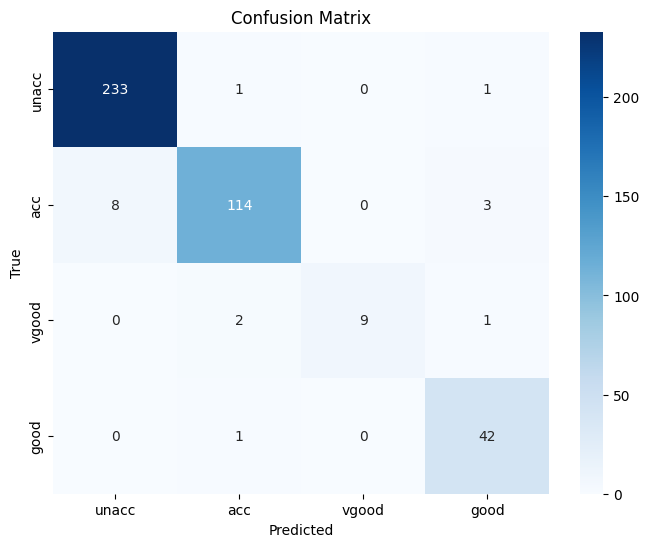

In [31]:
s_y_predict = knn.predict(s_X_test)
cm = confusion_matrix(s_y_test, s_y_predict)

class_labels = ['unacc', 'acc', 'vgood', 'good']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Get precision, recall, and F1-score
print(classification_report(s_y_test, s_y_predict, target_names=class_labels))

              precision    recall  f1-score   support

       unacc       0.97      0.99      0.98       235
         acc       0.97      0.91      0.94       125
       vgood       1.00      0.75      0.86        12
        good       0.89      0.98      0.93        43

    accuracy                           0.96       415
   macro avg       0.96      0.91      0.93       415
weighted avg       0.96      0.96      0.96       415

